# Diabetes Care
### Chenxue Hou
### Oct, 2024

## 1 Loading and Exploring the Data Set

Let's first read the data set from the file.

In [1]:
import pandas as pd

quality = pd.read_csv('Diabetes.csv')
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MemberID              131 non-null    int64  
 1   InpatientDays         131 non-null    int64  
 2   ERVisits              131 non-null    int64  
 3   OfficeVisits          131 non-null    int64  
 4   Narcotics             131 non-null    int64  
 5   DaysSinceLastERVisit  131 non-null    float64
 6   Pain                  131 non-null    int64  
 7   TotalVisits           131 non-null    int64  
 8   ProviderCount         131 non-null    int64  
 9   MedicalClaims         131 non-null    int64  
 10  ClaimLines            131 non-null    int64  
 11  StartedOnCombination  131 non-null    bool   
 12  AcuteDrugGapSmall     131 non-null    int64  
 13  PoorCare              131 non-null    int64  
dtypes: bool(1), float64(1), int64(12)
memory usage: 13.6 KB


0. MemberID is the unique identifier that numbers patients from 1 to 131. 
1. InpatientDays is the number of inpatient visits or the number of days that the patient spent in the hospital. 
2. ERVisits is the number of times the patient visited the emergency room. 
3. OfficeVisits is the number of times that the patient visited any doctor’s office. 
4. Narcotics is the number of prescriptions that the patient had for narcotics. 
5. DaysSinceLastERVisit is the number of days between the patient’s last emergency room (ER) visit and the end of the study period, and it is set to the length of the study period if they never visited the ER. 
6. Pain is the number of visits for which the patient complained about pain. 
7. TotalVisits is the total number of times the patient visited any healthcare provider. 
8. ProviderCount is the number of providers that served the patient. 
9. MedicalClaims is the number of days on which the patient had a medical claim. 
10. ClaimLines is the total number of medical claims. 
11. StartedOnCombination is whether or not the patient was started on a combination of drugs to treat their diabetes. 
12. AcuteDrugGapSmall is the fraction of acute drugs that were refilled quickly after the prescription ran out. 
13. PoorCare is the dependent variable, and is equal to 1 if the patient had poor care, and equal to 0 if the patient had good care.

We can see how many patients received poor care and how many patients received good care by using the `df.groupby` function.

In [2]:
quality.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [3]:
quality.tail()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
126,127,1,1,5,3,444.000000,0,7,11,11,36,False,0,0
127,128,1,0,3,2,731.000000,0,4,35,18,106,False,2,0
128,129,15,11,5,9,180.958333,95,31,56,43,265,False,3,0
129,130,0,2,14,1,216.958333,5,16,26,41,138,False,1,1
130,131,30,1,22,3,452.000000,38,53,20,103,189,False,13,0


In [4]:
quality['PoorCare'].value_counts()

PoorCare
0    98
1    33
Name: count, dtype: int64

The percentage of patients received poor care can be computed as follows.

In [5]:
import numpy as np
percPC = np.sum(quality['PoorCare'])/len(quality)
percPC

0.25190839694656486

You can see from the output of the `df.info()` function that the variable PoorCare is of `int` type, which stands for integer. In this case, since PoorCare is recorded as 0 or 1 in the data file, it is treated as a numerical variable, in particular, an integer variable. For numerical variables, we can use the `df.describe()` function to take a look at some of its statistics.

In [6]:
quality['PoorCare'].describe()

count    131.000000
mean       0.251908
std        0.435775
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        1.000000
Name: PoorCare, dtype: float64

However, in our case, PoorCare should be treated as a categorical variable, i.e., `categotical` data type in pandas. The type of variable will make a big difference in the way that Python handles the variable. We can convert its type to `categorical` using the following command.

In [7]:
quality['PoorCare'] = quality['PoorCare'].astype('category')
quality['PoorCare']

0      0
1      0
2      0
3      0
4      0
      ..
126    0
127    0
128    0
129    1
130    0
Name: PoorCare, Length: 131, dtype: category
Categories (2, int64): [0, 1]

Now, if we apply the `describe()` function on PoorCare, it will be handled differently. No statistics will be computed because it is not a number now. What you will see is count for each possible outcome, called categories in Python.

In [8]:
quality['PoorCare'].describe()

count     131
unique      2
top         0
freq       98
Name: PoorCare, dtype: int64

## 2 Baseline Model for Predicting Patients Receiving Good Care

The baseline model for such a classification problem is to just predict the most frequent outcome for all observations. Since good care is more common than poor care, we would predict that all patients are receiving good care, which gives us an accuracy of 74.81%.

## 3 Splitting the Data Set for Training and Testing

It is a good practice to train and test any models using different data sets as we have done before. In this case, we only have one data set, so the common practice is to randomly split the data set into a training set and a test set, where the test set is used to measure the out-of-sample accuracy of our model.

In [9]:
from sklearn.model_selection import train_test_split
X = quality.loc[:,['OfficeVisits','Narcotics']]
y = quality['PoorCare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
#random_state:control the random number generator used. 

In [10]:
y_train.value_counts()

PoorCare
0    66
1    25
Name: count, dtype: int64

In [11]:
y_test.value_counts()

PoorCare
0    32
1     8
Name: count, dtype: int64

## 4 Building a Logistic Regression Model

Now, we are ready to build a logistic regression model using OfficeVisits and Narcotics as independent variables, similar to building a linear regression model. In the code below, we use the function, `LogisticRegression`.

In [12]:
from sklearn.linear_model import LogisticRegression
QualityLog = LogisticRegression(random_state=0, solver='lbfgs')
# train logistic model based on training set
# solver:Algorithm to use in the optimization problem. 
# The choice of the algorithm depends on the penalty chosen.
QualityLog.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [13]:
print('the weight of Logistic Regression:',QualityLog.coef_)
print('the intercept(w0) of Logistic Regression:',QualityLog.intercept_)

the weight of Logistic Regression: [[0.0796848  0.12016687]]
the intercept(w0) of Logistic Regression: [-2.69738187]


In [14]:
score =QualityLog.score(X_train, y_train)
print('Mean accuracy:', score)

Mean accuracy: 0.8351648351648352


In [15]:
QualityLog.predict(X_train)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

## 5 In-Sample Model Validation(Logistic Regression Model)
### 5.1 Sensitivity and Specificity

We can now make predictions on the training set. The attribute = `predict_proba` in the code below makes sure that the algorithm uses the logistic response function to compute the predictions for probabilities, which should be numbers between 0 and 1. You can try removing this argument and see what you get.

In [16]:
predictTrain = pd.DataFrame(QualityLog.predict_proba(X_train)[:,1])
predictTrain.describe()

,0
count,91.000000
mean,0.274725
std,0.245058
min,0.063128
25%,0.119303
50%,0.182111
75%,0.314081
max,0.998673


Let us take a look at the predicted probabilities of receiving poor care for the first ten patients in the training set, and compare them to the actual observations.

In [17]:
predictTrain.head(10)

,0
0,0.081822
1,0.724744
2,0.445034
3,0.098033
4,0.149328
5,0.149165
6,0.817882
7,0.098033
8,0.063128
9,0.134697


In [18]:
y_train.head(10)

66     0
55     1
103    1
32     0
67     0
108    0
104    1
80     0
42     0
21     0
Name: PoorCare, dtype: category
Categories (2, int64): [0, 1]

Let us see if the model is predicting higher probabilities for the actual poor care cases as we expect.

In [19]:
predictTrain.pivot_table(index = y_train,aggfunc='mean')

C:\Users\la22484\AppData\Local\Temp\ipykernel_13472\3127564869.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  predictTrain.pivot_table(index = y_train,aggfunc='mean')


,0
PoorCare,
0,0.226313
1,0.228613


If we use 0.5 as the threshold, we get the following confusion matrix.

In [20]:
conf05 = pd.crosstab(index = y_train,columns=np.array((predictTrain>0.5).iloc[: , 0]),colnames=['predictTrain>0.5'])
conf05

predictTrain>0.5,False,True
PoorCare,,
0,64,2
1,13,12


You can see here that for 64 cases, we predict good care, and they received good care; and for 12 cases, we predict poor care, and they received poor care. We make 2 mistakes where we say poor care, but care was good, and we make 13 mistakes where we say good care, but the care was poor. The accuracy of the prediction using 0.5 as the threshold is $76/91=83.52\%$.

We can compute the sensitivity, or the true positive rate, which equals to $12/25 = 48\%$, and the specificity, or the true negative rate, which equals to $64/66 =96.97\%$.

Let us try increasing the threshold.

In [21]:
conf065 = pd.crosstab(index = y_train, columns=np.array((predictTrain>0.65).iloc[: , 0]),colnames=['predictTrain>0.65'])
conf065

predictTrain>0.65,False,True
PoorCare,,
0,64,2
1,16,9


Now the sensitivity equals to $9/25 = 36\%$, and the specificity equals to $64/66 = 96.97\%$. By increasing the threshold, our sensitivity goes down, and our specificity holds. We can also try decreasing the threshold.

In [22]:
conf02 = pd.crosstab(index =  y_train, columns=np.array((predictTrain>0.2).iloc[: , 0]),colnames=['predictTrain>0.2'])
conf02

predictTrain>0.2,False,True
PoorCare,,
0,46,20
1,7,18


Now the sensitivity equals to $18/25 = 72\%$ and the specificity equals to $46/66 = 69.70\%$. By decreasing the threshold, our sensitivity goes up, and our specificity goes down.

### 5.2 Receiver Operating Characteristic (ROC) Curves
To generate receiver operating characteristic (ROC) curves in python, we need to import a new package from sklearn, called `roc_curve` .

In [23]:
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

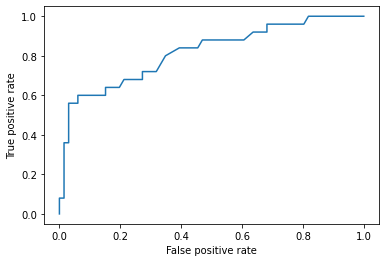

In [24]:
quality_proba = QualityLog.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, quality_proba)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Recall that we made predictions on our training set and called them predictTrain. We will use these predictions to create our ROC curve.

We can add more visual effects to the ROC plot.

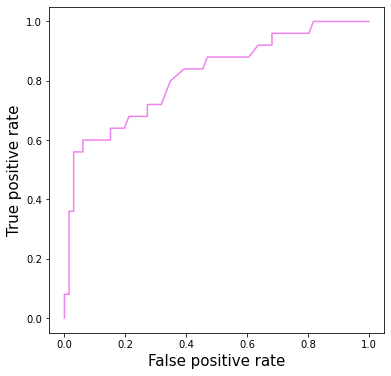

In [25]:
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr, color='violet')
plt.xlabel('False positive rate' ,fontdict={'size':15})
plt.ylabel('True positive rate' , fontdict={'size':15})
plt.show()

Now let us compute the area under the ROC curve (AUROC), or simply AUC.

In [26]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, quality_proba)
auc

0.8175757575757575

There are other packages available for plotting ROC, and they offer different features that may be useful in some situations. For example, if we want to color the area under the ROC curve, we can use the `pyplot.fill` function in the “matplotlib” package. Remember to import this package before plotting.

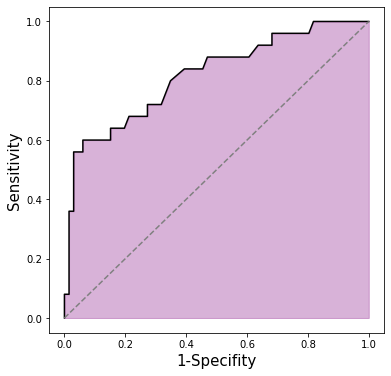

In [27]:
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr, color='black')
plt.xlabel('1-Specifity' ,fontdict={'size':15})
plt.ylabel('Sensitivity' , fontdict={'size':15})

plt.fill_between(x=fpr, y1=0, y2=tpr, color = "purple", alpha = 0.3) 
plt.plot((0,1),(0,1),ls='--',c='grey')

plt.show()

Note that by default, the x-axis for the `plt.plot` function is specificity, which equals (1 - false-positive rate), and the numbers go from 1 to 0 from left to right.

## 6 Out-of-Sample Model Validation(Logistic Regression Model)

Similarly, we can perform the out-of-sample test for our model using the test data set.

In [28]:
predictTest = pd.DataFrame(QualityLog.predict_proba(X_test)[:,1])

conf03out = pd.crosstab(index = y_test,  columns=np.array((predictTest>0.3).iloc[: , 0]),colnames=['predictTest>0.3'])
conf03out

predictTest>0.3,False,True
PoorCare,,
0,27,5
1,5,3


The accuracy is $30/40=75\%$.

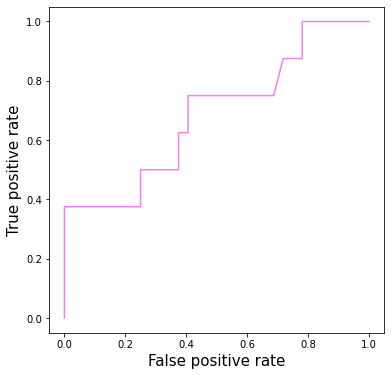

In [29]:
quality_proba_test = QualityLog.predict_proba(X_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, quality_proba_test)

plt.figure(figsize=(6,6))
plt.plot(fpr_test, tpr_test, color='violet')
plt.xlabel('False positive rate' ,fontdict={'size':15})
plt.ylabel('True positive rate' , fontdict={'size':15})

plt.show()

Now let us compute the area under the ROC curve (AUROC), or simply AUC.

In [30]:
auc_test = roc_auc_score(y_test, quality_proba_test)
auc_test

0.685546875

The out-of-sample AUC of our model is 0.69.